# Author: Anjaney J Pandey
The goal is to analyze the output of RACIPE simulations and finalize the different networks (#1, #2 or #3) for further analysis by comparing with the experimental data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
import os

In [ ]:

base_dir = "./RACIPE/CCLE_Heatmaps"
os.makedirs(base_dir, exist_ok=True) 

signature_names = [
    'Epithelial', 'Mesenchymal', 'EMT', 'Luminal', 'Basal', 'TamRes',
    'Glycolysis', 'OXPHOS', 'Hypoxia', 'Ferroptosis', 'FAO', 'RPMS', 'BPMS'
]

# Define gene sets

gene_sets = {
    'Epithelial': "KRT19	AGR2	RAB25	CDH1	ERBB3	FXYD3	SLC44A4	S100P	SCNN1A	GALNT3	PRSS8	ELF3	CEACAM6	TMPRSS4	CLDN7	TACSTD2	CLDN3	EPCAM	SPINT1	TSPAN1	PLS1	TMEM30B	PRR15L	KRT8	ST14	RBM47	S100A14	C1orf106	NQO1	TOX3	PTK6	TFF1	CLDN4	GPRC5A	TJP3	KRT18	MAP7	CKMT1A	ESRP1	MUC1	SPINT2	ESRP2	CDS1	PPAP2C	CEACAM7	TTC39A	OVOL2	EHF	AP1M2	CEACAM5	LAD1	ARHGAP8	TFF3	JUP	CD24	TMC5	MLPH	ELMO3	ERBB2	LLGL2	DDR1	FA2H	CBLC	TMPRSS2	LSR	PERP	POF1B	MYO5C	RAB11FIP1	MAPK13	KRT7	CEACAM1	CXADR	ATP2C2	RNF128	MPZL2	EPS8L1	GALNT7	CORO2A	BCAS1	TPD52	ARHGAP32	FUT2	OR7E14P	GALE	GRHL2	BIK	RAPGEFL1	STYK1	F11R	PKP3	CYB561	SH3YL1	GDF15	PSCA	EZR	TJP2	FGFR3	FUT3	BSPRY	TOM1L1  	IRF6  	EPB41L4B 	SPDEF	OCLN	LRRC1	C19orf21	ABHD11	EPS8L2	MYO6	TSPAN8	MST1R	SLC16A5	GPR56	AZGP1	TOB1	SLC35A3	TRPM4	PHLDA2	VAMP8	SLC22A18	AKR1B10	VAV3	SPAG1	ABCC3	SYNGR2	STAP2	C4orf19	PPL	PLLP	DSG2	HDHD3	CD2AP	MANSC1	DHCR24	EPN3	TUFT1	GMDS	EXPH5	DSP	SDC4	IL20RA	FAM174B	PTPRF	SORD",
    'Mesenchymal': "GAS1	CXCL12	ZEB1	GLYR1	FHL1	FERMT2	C1S	FYN	WIPF1	CYP1B1	SERPING1	SERPINF1	VCAM1	MAP1B	TCF4	SRPX	EMP3	DPT	CALD1	PTGIS	VIM	CD163	C1R	FBN1	FN1	FXYD6	IGF1	NAP1L3	MRC1	QKI	MS4A4A	DCN	LOX	RECK	ANK2	LY96	ZFPM2	CSRP2	EFEMP1	RARRES2	PTPRC	PLEKHO1	RGS2	F13A1	JAM2	CHRDL1	TUBA1A	AP1S2	MYLK	DDR2	DSE	SACS	GLIPR1	CXCL13	FLRT2	PTX3	AKT3	COL6A2	DPYSL3	CDH11	PDZRN3	ZEB2	CCL2	MAFB	SFRP1	C14orf139	MFAP4	MAF	UCHL1	TUBB6	SRGN	HEG1	KCNJ8	AKAP12	EVI2A	COL14A1	AXL	ECM2	FSTL1	PLN	MYL9	OLFML3	STON1	SLIT2	BICC1	SOBP	CLIC4	ENPP2	SAMSN1	TPM2	ASPN	COL6A1	IGFBP5	MOXD1	AKAP2	SLC2A3	OLFML2B	ANGPTL2	PCOLCE	COLEC12	CTSK	TAGLN	CDH2	IL10RA	C1orf54	CEP170	TNS1	CLEC2B	JAM3	Sep-06	GREM1	VCAN	ZCCHC24	CRYAB	SFRP4	RUNX1T1	FGL2	MS4A6A	PTRF	GIMAP4	TWIST1	GFPT2	LHFP	CXCR4	SPOCK1	SPARC	VSIG4	GPM6B	TRPC1	SNAI2	GUCY1B3	PLXNC1	SYT11	FLI1	MYH10	CSF2RB	TNC	PMP22	COL5A2	MMP2	GNG11	CAV1	CDK14	SDC2	PTGDS	NR3C1	SYNM	FAP	NUAK1	WWTR1	FBLN1	MPDZ	SYNE1	EFEMP2	GIMAP6	KIAA1462	CCL8	COL15A1	CHN1	CRISPLD2	PDGFC	GEM	ISLR	GZMK	SPARCL1	BNC2	BGN	MEOX2	ITM2A	IFFO1",
    'EMT': "ABI3BP	ACTA2	ADAM12	ANPEP	APLP1	AREG	BASP1	BDNF	BGN	BMP1	CADM1	CALD1	CALU	CAP2	CAPG	CCN1	CCN2	CD44	CD59	CDH11	CDH2	CDH6	COL11A1	COL12A1	COL16A1	COL1A1	COL1A2	COL3A1	COL4A1	COL4A2	COL5A1	COL5A2	COL5A3	COL6A2	COL6A3	COL7A1	COL8A2	COLGALT1	COMP	COPA	CRLF1	CTHRC1	CXCL1	CXCL12	CXCL6	CXCL8	DAB2	DCN	DKK1	DPYSL3	DST	ECM1	ECM2	EDIL3	EFEMP2	ELN	EMP3	ENO2	FAP	FAS	FBLN1	FBLN2	FBLN5	FBN1	FBN2	FERMT2	FGF2	FLNA	FMOD	FN1	FOXC2	FSTL1	FSTL3	FUCA1	FZD8	GADD45A	GADD45B	GAS1	GEM	GJA1	GLIPR1	GPC1	GPX7	GREM1	HTRA1	ID2	IGFBP2	IGFBP3	IGFBP4	IL15	IL32	IL6	INHBA	ITGA2	ITGA5	ITGAV	ITGB1	ITGB3	ITGB5	JUN	LAMA1	LAMA2	LAMA3	LAMC1	LAMC2	LGALS1	LOX	LOXL1	LOXL2	LRP1	LRRC15	LUM	MAGEE1	MATN2	MATN3	MCM7	MEST	MFAP5	MGP	MMP1	MMP14	MMP2	MMP3	MSX1	MXRA5	MYL9	MYLK	NID2	NNMT	NOTCH2	NT5E	NTM	OXTR	P3H1	PCOLCE	PCOLCE2	PDGFRB	PDLIM4	PFN2	PLAUR	PLOD1	PLOD2	PLOD3	PMEPA1	PMP22	POSTN	PPIB	PRRX1	PRSS2	PTHLH	PTX3	PVR	QSOX1	RGS4	RHOB	SAT1	SCG2	SDC1	SDC4	SERPINE1	SERPINE2	SERPINH1	SFRP1	SFRP4	SGCB	SGCD	SGCG	SLC6A8	SLIT2	SLIT3	SNAI2	SNTB1	SPARC	SPOCK1	SPP1	TAGLN	TFPI2	TGFB1	TGFBI	TGFBR3	TGM2	THBS1	THBS2	THY1	TIMP1	TIMP3	TNC	TNFAIP3	TNFRSF11B	TNFRSF12A	TPM1	TPM2	TPM4	VCAM1	VCAN	VEGFA	VEGFC	VIM	WIPF1	WNT5A",
    'Luminal': "TFF3	GRM4	GATA3	KRT8	ESR1	FOXA1	LIV1	MUC1	CX3CL1	GRM8	KRT18	NCAM1	NMUR1	PGR	XBP1",
    'Basal': "CK5/6	ANLN	CCNE2	CDC7	CDCA7	CENPI	CENPK	CKS2	DCS2	FABP7	KIF18A	KRT17	KRT6b	Laminin	MIA	STIL",
    'TamRes': "ACTA1	ANG	ARL4A	B2M	BCAS1	BST2	BTG3	CACNB3	CPE	CRABP1	CTSD	CXADR	DECR1	E2F1	EBAG9	EGR3	EIF2AK2	EPHX1	GAGE13	GTF2E2	ID1	ID3	IFI27	IFI44	IFI6	IFIT1	IFITM1	IFITM3	IRF2	IRF9	ISG15	LGALS3BP	MX1	NMI	NMT1	NNAT	NRIP1	PITX1	PPP2R2A	PROCR	PTK6	SCGB2A2	SELENOP	SEPHS2	SNX1	TAGLN	TFF1	TFF3	TFPI2	TSPAN3	TSPAN8	TUSC3	UGT2B15",
    'Glycolysis': "ABCB6	ADORA2B	AGL	AGRN	AK3	AK4	AKR1A1	ALDH7A1	ALDH9A1	ALDOA	ALDOB	ALG1	ANG	ANGPTL4	ANKZF1	ARPP19	ARTN	AURKA	B3GALT6	B3GAT1	B3GAT3	B3GNT3	B4GALT1	B4GALT2	B4GALT4	B4GALT7	BIK	BPNT1	CACNA1H	CAPN5	CASP6	CD44	CDK1	CENPA	CHPF	CHPF2	CHST1	CHST12	CHST2	CHST4	CHST6	CITED2	CLDN3	CLDN9	CLN6	COG2	COL5A1	COPB2	CTH	CXCR4	CYB5A	DCN	DDIT4	DEPDC1	DLD	DPYSL4	DSC2	ECD	EFNA3	EGFR	EGLN3	ELF3	ENO1	ENO2	ERO1A	EXT1	EXT2	FAM162A	FBP2	FKBP4	FUT8	G6PD	GAL3ST1	GALE	GALK1	GALK2	GAPDHS	GCLC	GFPT1	GFUS	GLCE	GLRX	GMPPA	GMPPB	GNE	GNPDA1	GOT1	GOT2	GPC1	GPC3	GPC4	GPR87	GUSB	GYS1	GYS2	HAX1	HDLBP	HK2	HMMR	HOMER1	HS2ST1	HS6ST2	HSPA5	IDH1	IDUA	IER3	IGFBP3	IL13RA1	IRS2	ISG20	KDELR3	KIF20A	KIF2A	LCT	LDHA	LDHC	LHPP	LHX9	MDH1	MDH2	ME1	ME2	MED24	MERTK	MET	MIF	MIOX	MPI	MXI1	NANP	NASP	NDST3	NDUFV3	NOL3	NSDHL	NT5E	P4HA1	P4HA2	PAM	PAXIP1	PC	PDK3	PFKFB1	PFKP	PGAM1	PGAM2	PGK1	PGLS	PGM2	PHKA2	PKM	PKP2	PLOD1	PLOD2	PMM2	POLR3K	PPFIA4	PPIA	PPP2CB	PRPS1	PSMC4	PYGB	PYGL	QSOX1	RARS1	RBCK1	RPE	RRAGD	SAP30	SDC1	SDC2	SDC3	SDHC	SLC16A3	SLC25A10	SLC25A13	SLC35A3	SLC37A4	SOD1	SOX9	SPAG4	SRD5A3	STC1	STC2	STMN1	TALDO1	TFF3	TGFA	TGFBI	TKTL1	TPBG	TPI1	TPST1	TXN	UGP2	VCAN	VEGFA	VLDLR	XYLT2	ZNF292",
    'OXPHOS': "ABCB7	ACAA1	ACAA2	ACADM	ACADSB	ACADVL	ACAT1	ACO2	AFG3L2	AIFM1	ALAS1	ALDH6A1	ATP1B1	ATP5F1A	ATP5F1B	ATP5F1C	ATP5F1D	ATP5F1E	ATP5MC1	ATP5MC2	ATP5MC3	ATP5ME	ATP5MF	ATP5MG	ATP5PB	ATP5PD	ATP5PF	ATP5PO	ATP6AP1	ATP6V0B	ATP6V0C	ATP6V0E1	ATP6V1C1	ATP6V1D	ATP6V1E1	ATP6V1F	ATP6V1G1	ATP6V1H	BAX	BCKDHA	BDH2	CASP7	COX10	COX11	COX15	COX17	COX4I1	COX5A	COX5B	COX6A1	COX6B1	COX6C	COX7A2	COX7A2L	COX7B	COX7C	COX8A	CPT1A	CS	CYB5A	CYB5R3	CYC1	CYCS	DECR1	DLAT	DLD	DLST	ECH1	ECHS1	ECI1	ETFA	ETFB	ETFDH	FDX1	FH	FXN	GLUD1	GOT2	GPI	GPX4	GRPEL1	HADHA	HADHB	HCCS	HSD17B10	HSPA9	HTRA2	IDH1	IDH2	IDH3A	IDH3B	IDH3G	IMMT	ISCA1	ISCU	LDHA	LDHB	LRPPRC	MAOB	MDH1	MDH2	MFN2	MGST3	MPC1	MRPL11	MRPL15	MRPL34	MRPL35	MRPS11	MRPS12	MRPS15	MRPS22	MRPS30	MTRF1	MTRR	MTX2	NDUFA1	NDUFA2	NDUFA3	NDUFA4	NDUFA5	NDUFA6	NDUFA7	NDUFA8	NDUFA9	NDUFAB1	NDUFB1	NDUFB2	NDUFB3	NDUFB4	NDUFB5	NDUFB6	NDUFB7	NDUFB8	NDUFC1	NDUFC2	NDUFS1	NDUFS2	NDUFS3	NDUFS4	NDUFS6	NDUFS7	NDUFS8	NDUFV1	NDUFV2	NNT	NQO2	OAT	OGDH	OPA1	OXA1L	PDHA1	PDHB	PDHX	PDK4	PDP1	PHB2	PHYH	PMPCA	POLR2F	POR	PRDX3	RETSAT	RHOT1	RHOT2	SDHA	SDHB	SDHC	SDHD	SLC25A11	SLC25A12	SLC25A20	SLC25A3	SLC25A4	SLC25A5	SLC25A6	SUCLA2	SUCLG1	SUPV3L1	SURF1	TCIRG1	TIMM10	TIMM13	TIMM17A	TIMM50	TIMM8B	TIMM9	TOMM22	TOMM70	UQCR10	UQCR11	UQCRB	UQCRC1	UQCRC2	UQCRFS1	UQCRH	UQCRQ	VDAC1	VDAC2	VDAC3",
    'Hypoxia': "ACKR3	ADM	ADORA2B	AK4	AKAP12	ALDOA	ALDOB	ALDOC	AMPD3	ANGPTL4	ANKZF1	ANXA2	ATF3	ATP7A	B3GALT6	B4GALNT2	BCAN	BCL2	BGN	BHLHE40	BNIP3L	BRS3	BTG1	CA12	CASP6	CAV1	CAVIN1	CAVIN3	CCN1	CCN2	CCN5	CCNG2	CDKN1A	CDKN1B	CDKN1C	CHST2	CHST3	CITED2	COL5A1	CP	CSRP2	CXCR4	DCN	DDIT3	DDIT4	DPYSL4	DTNA	DUSP1	EDN2	EFNA1	EFNA3	EGFR	ENO1	ENO2	ENO3	ERO1A	ERRFI1	ETS1	EXT1	F3	FAM162A	FBP1	FOS	FOSL2	FOXO3	GAA	GALK1	GAPDH	GAPDHS	GBE1	GCK	GCNT2	GLRX	GPC1	GPC3	GPC4	GPI	GRHPR	GYS1	HAS1	HDLBP	HEXA	HK1	HK2	HMOX1	HOXB9	HS3ST1	HSPA5	IDS	IER3	IGFBP1	IGFBP3	IL6	ILVBL	INHA	IRS2	ISG20	JMJD6	JUN	KDELR3	KDM3A	KIF5A	KLF6	KLF7	KLHL24	LALBA	LARGE1	LDHA	LDHC	LOX	LXN	MAFF	MAP3K1	MIF	MT1E	MT2A	MXI1	MYH9	NAGK	NCAN	NDRG1	NDST1	NDST2	NEDD4L	NFIL3	NOCT	NR3C1	P4HA1	P4HA2	PAM	PCK1	PDGFB	PDK1	PDK3	PFKFB3	PFKL	PFKP	PGAM2	PGF	PGK1	PGM1	PGM2	PHKG1	PIM1	PKLR	PKP1	PLAC8	PLAUR	PLIN2	PNRC1	PPARGC1A	PPFIA4	PPP1R15A	PPP1R3C	PRDX5	PRKCA	PYGM	RBPJ	RORA	RRAGD	S100A4	SAP30	SCARB1	SDC2	SDC3	SDC4	SELENBP1	SERPINE1	SIAH2	SLC25A1	SLC2A1	SLC2A3	SLC2A5	SLC37A4	SLC6A6	SRPX	STBD1	STC1	STC2	SULT2B1	TES	TGFB3	TGFBI	TGM2	TIPARP	TKTL1	TMEM45A	TNFAIP3	TPBG	TPD52	TPI1	TPST2	UGP2	VEGFA	VHL	VLDLR	WSB1	XPNPEP1	ZFP36	ZNF292",
    'Ferroptosis': "ACSL1	ACSL3	ACSL4	ACSL5	ACSL6	AIFM2	AKR1C1	AKR1C2	AKR1C3	ALOX15	ATG5	ATG7	BACH1	CBS	CHMP5	CHMP6	CISD1	COQ2	CP	CTH	CYBB	DPP4	FDFT1	FTH1	FTL	FTMT	GCH1	GCLC	GCLM	GPX4	GSS	HMGCR	HMOX1	HSPB1	IREB2	LPCAT3	MAP1LC3A	MAP1LC3B	MAP1LC3C	NCOA4	NOX1	NOX4	PCBP1	PCBP2	PHKG2	POR	PRNP	SAT1	SAT2	SLC11A2	SLC1A5	SLC38A1	SLC39A14	SLC39A8	SLC3A2	SLC40A1	SLC7A11	STEAP3	TF	TFRC	TP53	TXNRD1	VDAC2	VDAC3",
    'FAO': "AADAT	ACAA1	ACAA2	ACADL	ACADM	ACADS	ACADVL	ACAT2	ACO2	ACOT2	ACOT8	ACOX1	ACSL1	ACSL4	ACSL5	ACSM3	ACSS1	ADH1C	ADH7	ADIPOR2	ADSL	ALAD	ALDH1A1	ALDH3A1	ALDH3A2	ALDH9A1	ALDOA	AOC3	APEX1	AQP7	AUH	BCKDHB	BLVRA	BMPR1B	BPHL	CA2	CA4	CA6	CBR1	CBR3	CD1D	CD36	CEL	CIDEA	CPOX	CPT1A	CPT2	CRAT	CRYZ	CYP1A1	CYP4A11	CYP4A22	D2HGDH	DECR1	DHCR24	DLD	DLST	ECH1	ECHS1	ECI1	ECI2	EHHADH	ELOVL5	ENO2	ENO3	EPHX1	ERP29	ETFDH	FABP1	FABP2	FASN	FH	FMO1	G0S2	GABARAPL1	GAD2	GAPDHS	GCDH	GLUL	GPD1	GPD2	GRHPR	GSTZ1	H2AZ1	HADH	HADHB	HAO2	HCCS	HIBCH	HMGCL	HMGCS1	HMGCS2	HPGD	HSD17B10	HSD17B11	HSD17B4	HSD17B7	HSDL2	HSP90AA1	HSPH1	IDH1	IDH3B	IDH3G	IDI1	IL4I1	INMT	KMT5A	LDHA	LGALS1	LTC4S	MAOA	MCEE	MDH1	MDH2	ME1	METAP1	MGLL	MIF	MIX23	MLYCD	NBN	NCAPH2	NSDHL	NTHL1	ODC1	OSTC	PCBD1	PDHA1	PDHB	PPARA	PRDX6	PSME1	PTPRG	PTS	RAP1GDS1	RDH11	RDH16	REEP6	RETSAT	S100A10	SDHA	SDHC	SDHD	SERINC1	SLC22A5	SMS	SUCLA2	SUCLG1	SUCLG2	TDO2	TP53INP2	UBE2L6	UGDH	UROD	UROS	VNN1	XIST	YWHAH",
    'RPMS': "PEBP1	IGF2BP2	GOLT1B	NRAS	RDX	NF2	DMD	BACH1	MAP4K4	COL5A2	CDV3	COL3A1	HMGA2	COL1A2	TGFBR1	PAPPA	IGF2BP3	ARID3B	LRIG2	IRS2	HIC2	IL13	GNPTAB	KRT16	TNFRSF12A	ENO1	EN1	TAGLN2	BAG2	HMGA1	DSC2	GPR56	LAMC1	S100A10	PKP3	NDRG2	EMP3	EIF4G1	PSMD4	PIM1	GTPBP2	FADS3	OSBP	EPHB2	PSME4	DYSF	BRD2	MAST2	MAP2	UBE2E3	SQSTM1	RGS2	SYNGR1	ELK3	UBE2C	DIAPH1	ABCD1	COL7A1	CAPN6	MMP3	LAMB3	PPP1R15A	GNAI1	RPS6KA4	ABCA2	F2RL2	LAMC2	TRAPPC3	OR2F1	AKAP1	FAP	GIT1	KRT8	RAB3D	ATP1B1	ELAVL2	PHLDA2	PCDH17	ENO2	BDKRB1	CA7	GKN1	ADRA1A	PSMD7	BMP2	GPR3	BTK	SNCB	LPP	NR1I3	HOXB3	CDKN1A	TIAL1	APOBEC1	DLG4	IL1RN	MPV17	HCN3	SHC3	RPL23A	KCNA2	DYRK1A	FOXN1	DCTN2	PADI4	MARK1	RAB30	GFAP	AKT3	EEF1A1	LMNA	LTB4R2	SCRN1	HMGA2	MMP1	SPP1	CXCR4",
    'BPMS': "BMPER	DYM	FBXO42	FRMPD4	HERC3	HS3ST3B1	IL1RAP	IL7	MAGEC1	MYCT1	PDE1C	PRDM1	RCAN3"
}

# Split the gene sets into a dictionary of lists
gene_sets = {name: gene_set.split('\t') for name, gene_set in gene_sets.items()}

For SIMULATED DATA, we define the scores based on Sarthak's iScience 2024 paper

In [2]:
model1_colnames = ["model_no", "no_of_stable_states", "runs_that_converged",
                "OCT4", "MIR145", "AMPK", "HIF1A", "MIR200A", "mtROS", "noxROS", 
                "SNAI1", "ZEB1", "BACH1", "PEBP1", "SNAI2", "CDH1", "NRF2", "ERa36", 
                "ERa66", "GATA3", "let7", "PDL1", "PGR", "FOXA1", "LIN28A", "MIR34A", "TP63"]

model2_colnames = ["model_no", "no_of_stable_states", "runs_that_converged", 
           "SNAI1", "MIR34A", "ZEB1", "MIR200A", "SNAI2", "ERa66", "HIF1A", 
           "LIN28A", "AMPK", "let7", "NFKB1", "ERa36", "KEAP1", "NRF2", 
           "CDH1", "PDL1", "PGR", "GATA3", "PEBP1", "BACH1", "TP63", 
           "MIR145", "OCT4", "FOXA1", "EGFR", "HMOX1", "LDHA", "FASN", 
           "G6PD", "ENO1", "GPI", "CPT1A", "GPX4", "IRS2", "SOD1", "PFKP", "PGK1"]

model3_colnames = ["model_no", "no_of_stable_states", "runs_that_converged", 
           "SNAI1", "MIR34A", "ZEB1", "MIR200A", "SNAI2", "ERa66", "HIF1A", 
           "LIN28A", "AMPK", "let7", "NFKB1", "ERa36", "KEAP1", "NRF2", 
           "CDH1", "PDL1", "PGR", "GATA3", "PEBP1", "BACH1", "TP63", 
           "MIR145", "OCT4", "FOXA1", "EGFR", "HMOX1", "LDHA", "FASN", 
           "G6PD", "ENO1", "CPT1A", "GPX4"]

In [ ]:
model1_raw = pd.read_csv("./RACIPE/CCLE_Heatmaps/model1.dat", sep="\t", header=0, names=model1_colnames)
model2_raw = pd.read_csv("./RACIPE/CCLE_Heatmaps/model2.dat", sep="\t", header=0, names=model2_colnames)
model3_raw = pd.read_csv("./RACIPE/CCLE_Heatmaps/model3.dat", sep="\t", header=0, names=model3_colnames)

models_raw = {1: model1_raw, 2: model2_raw, 3: model3_raw}

(1) luminal score as the sum of normalized steady state values of ERα66, GATA3, PGR, and FOXA1; (2) basal score as the sum of normalized steady state values of ΔNP63 and SLUG; (3) epithelial score as the sum of normalized steady state values of CDH1 and miR-200; (4) mesenchymal score as the sum of normalized steady state values of ZEB1 and SLUG; (5)  epithelial-mesenchymal score (= mesenchymal score–epithelial score)

# CCLE data (experimental single cell data for breast cancer)

In [ ]:
experimental_data = pd.read_csv("./Transcriptomics/CCLE_data/BC_expression_data.csv", index_col=0)
experimental_data.columns = experimental_data.columns.str.split(r" \(").str[0]
experimental_data = experimental_data.T
experimental_data.head()

,ACH-000017,ACH-000019,ACH-000028,ACH-000044,ACH-000097,ACH-000111,ACH-000117,ACH-000147,ACH-000148,ACH-000196,...,ACH-001419,ACH-001662,ACH-001683,ACH-001705,ACH-001819,ACH-001820,ACH-002399,ACH-002401,ACH-002499,ACH-002921
TFE3,3.722534,4.266733,4.361168,3.549629,4.190372,4.367042,4.710133,4.856611,4.677043,2.484979,...,3.542500,3.075755,3.796877,4.145094,5.717950,3.707158,4.149682,3.865276,5.461992,4.908397
MMADHC,6.266690,7.079445,6.817729,7.905465,7.564092,5.906817,6.372337,6.429490,6.602013,7.114966,...,5.652322,3.113208,6.551515,6.571996,7.009015,6.975526,7.091255,6.812025,6.675014,6.775331
PABPC1L,5.002232,5.409457,4.130194,7.159060,3.070522,2.903404,1.073920,6.326300,3.292067,4.868610,...,4.872513,6.566719,5.074522,5.567124,5.272234,4.214309,3.008310,4.139814,5.092854,5.552935
RELL2,4.230102,2.796074,2.783523,4.324917,4.857805,1.014646,3.178222,4.126492,3.754767,3.319798,...,2.330253,2.594006,2.838173,3.684162,2.877906,3.396660,2.572125,2.771767,3.411726,3.868765
GPT,0.787488,1.100392,0.899245,3.256654,1.828754,1.219459,0.939265,1.866166,0.645822,3.409545,...,0.459352,6.696135,0.740441,0.416134,0.584189,0.416134,0.372059,1.717072,0.480651,1.361787


## ssGSEA function

In [ ]:
def calc_ssgsea_score(ssgsea_data, path_gene_sets):
    ssgsea_score = ssgsea(ssgsea_data, gene_sets= gene_sets, 
                          outdir= "./RACIPE/CCLE_Heatmaps/ssgsea_ccle_brca", min_size=5)
    results = ssgsea_score.res2d
    return results

ssgsea_score = calc_ssgsea_score(experimental_data, gene_sets)

In [ ]:
ssgsea_results = pd.read_csv("./RACIPE/CCLE_Heatmaps/ssgsea_ccle_brca/gseapy.gene_set.ssgsea.report.csv")
ssgsea_results = ssgsea_results.set_index("Name")
ssgsea_results

,Term,ES,NES
Name,,,
ACH-000755,OXPHOS,7863.498646,0.716507
ACH-000573,OXPHOS,7859.903139,0.716179
ACH-001390,OXPHOS,7854.261832,0.715665
ACH-000248,OXPHOS,7833.848096,0.713805
ACH-000017,OXPHOS,7822.660769,0.712786
...,...,...,...
ACH-001396,EMT,47.817946,0.004357
ACH-001392,EMT,44.570399,0.004061
ACH-000857,BPMS,-35.443190,-0.003230


In [ ]:
# Plot heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(
    r_values_numeric_brca,
    annot=annot_matrix,
    vmin = -1, vmax= 1,
    fmt="",
    cmap="coolwarm",
    annot_kws={"fontsize": 13},
    linewidths=0.5,
    cbar= True
)
plt.title("BRCA CCLE Correlation (Experimental TPM Data)", size=25)
plt.xticks(rotation=90, size=18)
plt.yticks(rotation=0, size=18)
plt.tight_layout()
plt.show()

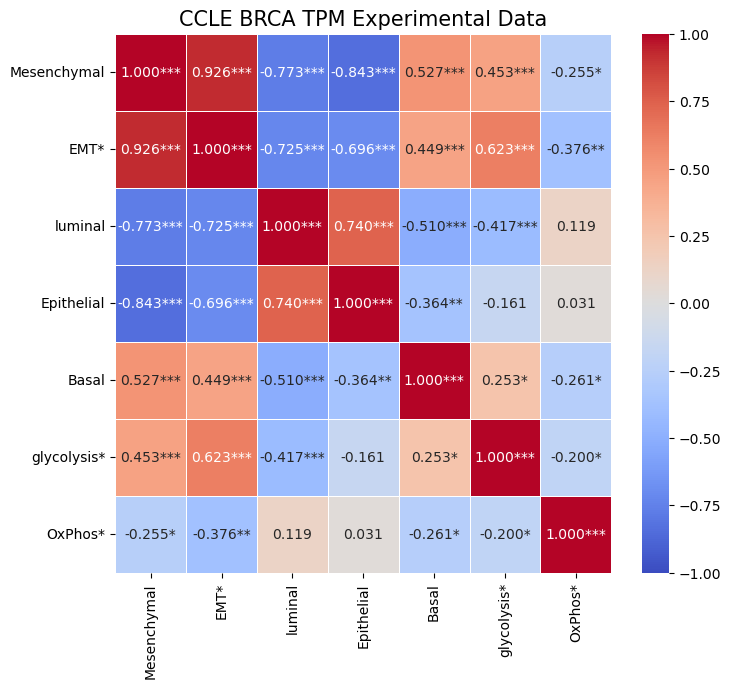

In [ ]:
# Plot EMT heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(
    r_values_numeric_req,
    annot=annot_matrix_req,
    vmin = -1, vmax= 1,
    fmt="",
    cmap="coolwarm",
    annot_kws={"fontsize": 10},
    linewidths=0.5,
    cbar= True
)
plt.title("CCLE BRCA TPM Experimental Data", size=15)
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

# For the Simulated Models

Calculates Spearman correlation and p-values for specified columns.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Calculate Spearman Correlation
def calculate_spearman_correlation(df, columns):
    df_subset = df[columns].copy()
    for col in columns:
        df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')

    corr_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)
    pval_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            if i >= j :
                if i == j:
                    corr, pval = 1.0, 0.0
                else:
                    valid_data = df_subset[[col1, col2]].dropna()
                    if len(valid_data) < 3:
                        corr, pval = np.nan, np.nan
                    else:
                        try: corr, pval = spearmanr(valid_data[col1], valid_data[col2])
                        except Exception: corr, pval = np.nan, np.nan
                corr_matrix.loc[col1, col2] = corr
                corr_matrix.loc[col2, col1] = corr
                pval_matrix.loc[col1, col2] = pval
                pval_matrix.loc[col2, col1] = pval
    return corr_matrix, pval_matrix

def format_annotations(r_values, p_values=None, is_difference=False):

    annot_matrix = pd.DataFrame(index=r_values.index, columns=r_values.columns, dtype=str)
    for i in r_values.index:
        for j in r_values.columns:
            r = r_values.loc[i, j]

            if pd.isna(r):
                annot_matrix.loc[i, j] = "NA"
                continue

            if is_difference:
                 annot_matrix.loc[i, j] = f"{abs(r):.2f}"
            else:
                 annot_matrix.loc[i, j] = f"{r:.2f}"

    return annot_matrix

Calculates signature scores from normalized data, handling missing genes.

In [ ]:

def calculate_simulation_scores(normalized_data, model_num):
    sim_scores = pd.DataFrame(index=normalized_data.index)
    print(f"Calculating scores for Model {model_num}...")

    def get_present_sum(genes_list):
        present_genes = [g for g in genes_list if g in normalized_data.columns]
        missing = set(genes_list) - set(present_genes)
        if not present_genes:
            return 0
        return normalized_data[present_genes].sum(axis=1)

    # Define formulas
    formulas = {
        'Luminal': ['ERa66', 'GATA3', 'PGR', 'FOXA1'],
        'Basal': ['TP63', 'SNAI2'],
        'Epithelial': ['CDH1', 'MIR200A'],
        'Mesenchymal': ['ZEB1', 'SNAI2'],
        'TamRes': ['ERa36', 'ERa66'],
        'Glycolysis': ['G6PD', 'LDHA', 'ENO1', 'HIF1A', 'NRF2'],
        'OXPHOS': ['AMPK', 'NRF2', 'MIR34A', 'TP63'],
        'Hypoxia': ['HIF1A', 'HMOX1', 'SNAI1', 'PGR', 'EGFR'],
        'Ferroptosis': ['GPX4', 'TP63', 'NRF2', 'CPT1A'],
        'FAO': ['FASN', 'CPT1A', 'PGR', 'EGFR', 'HIF1A'],
        'RPMS': ['PEBP1', 'CDH1', 'KEAP1', 'let7', 'MIR145'],
        'BPMS': ['BACH1', 'SNAI1', 'SNAI2', 'NRF2']
    }

    calculated_signatures = []
    for sig_name, genes in formulas.items():
        sim_scores[sig_name] = get_present_sum(genes)
        calculated_signatures.append(sig_name)

    # Calculate EMT score
    if 'Mesenchymal' in sim_scores.columns and 'Epithelial' in sim_scores.columns:
         if isinstance(sim_scores['Mesenchymal'], pd.Series) and isinstance(sim_scores['Epithelial'], pd.Series):
              sim_scores['EMT'] = sim_scores['Mesenchymal'] - sim_scores['Epithelial']
              calculated_signatures.append('EMT')
         else:
              print("  Warning: Cannot calculate EMT score due to missing or invalid component scores.")
              if 'EMT' in calculated_signatures: calculated_signatures.remove('EMT')
    else:
         print("  Warning: Mesenchymal or Epithelial score missing, cannot calculate EMT score.")

    final_signatures = [s for s in signature_names if s in calculated_signatures and s in sim_scores.columns]
    print(f"Successfully calculated scores for: {final_signatures}")
    return sim_scores[final_signatures]

In [ ]:
simulated_results = {}

if r_exp is not None:
    common_signatures_overall = set(r_exp.index)
    print(f"Initial common signatures from experimental: {len(common_signatures_overall)}")
else:
    print("Error: Cannot proceed without successful experimental correlation calculation.")
    common_signatures_overall = set()


# Process each model
if common_signatures_overall:
    for model_num, model_df_raw in models_raw.items():
        print(f"\n--- Processing Model {model_num} ---")
        model_results = {'success': False}

        try:
            print("Normalizing data...")
            columns = model_df_raw.columns
            non_gene_cols = ['Time', 'ID1', 'ID2']
            gene_columns = [col for col in model_df_raw.columns if col not in non_gene_cols]
            if not gene_columns:
                 print("Warning: No gene columns found for normalization.")
                 normalized_data = model_df_raw.copy()
            else:
                normalized_data = model_df_raw.copy()
                scaler = StandardScaler()
                normalized_data[gene_columns] = scaler.fit_transform(normalized_data[gene_columns])

            # Calculate Signature Scores
            sim_scores = calculate_simulation_scores(normalized_data, model_num)
            if sim_scores.empty:
                 print(f"Warning: No simulation scores could be calculated for Model {model_num}. Skipping.")
                 simulated_results[model_num] = model_results
                 continue

            available_signatures_sim = sim_scores.columns.tolist()
            if not available_signatures_sim:
                 print(f"Warning: No common target signatures were calculable for Model {model_num}. Skipping.")
                 simulated_results[model_num] = model_results
                 continue

            # Calculate Simulated Correlations
            print(f"Calculating correlations for {len(available_signatures_sim)} simulated signatures...")
            r_sim, p_sim = calculate_spearman_correlation(sim_scores, available_signatures_sim)
            annot_sim = format_annotations(r_sim, p_sim)

            common_signatures_overall.intersection_update(set(available_signatures_sim))
            if not common_signatures_overall:
                 print("Warning: Intersection of signatures became empty after processing this model. Comparison might not be possible.")

            # Store results
            model_results['r'] = r_sim
            model_results['p'] = p_sim
            model_results['annot'] = annot_sim
            model_results['success'] = True

            # Save individual model results
            sim_r_path = os.path.join(base_dir, f"model{model_num}_spearman_r_values.csv")
            sim_p_path = os.path.join(base_dir, f"model{model_num}_spearman_p_values.csv")
            r_sim.to_csv(sim_r_path)
            p_sim.to_csv(sim_p_path)
            print(f"Model {model_num} R/P values saved.")

        except Exception as e:
            print(f"!! An unexpected error occurred during processing Model {model_num}: {e}")
            model_results['success'] = False

        simulated_results[model_num] = model_results

    if not common_signatures_overall and r_exp is not None:
        print("Warning: No signatures are common across the experimental data and ALL processed models.")

        common_signatures_overall = set(available_signatures_exp)
        print(f"Plotting will use signatures available in experimental data: {len(common_signatures_overall)}")

else:
     print("Skipping simulation processing as experimental data processing failed.")

common_signatures_list = sorted(list(common_signatures_overall))


Processing All Simulated Models...
Initial common signatures from experimental: 9

--- Processing Model 1 ---
Normalizing data...
Calculating correlations for 13 simulated signatures...
Model 1 R/P values saved.

--- Processing Model 2 ---
Normalizing data...
Calculating correlations for 13 simulated signatures...
Model 2 R/P values saved.

--- Processing Model 3 ---
Normalizing data...
Calculating correlations for 13 simulated signatures...
Model 3 R/P values saved.

Finished processing models. Final common signatures for plotting: 9


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import os
import pandas as pd

if r_exp is None or not common_signatures_list:
    print("Cannot generate plot. Experimental data or common signatures are missing.")
else:
    # Data Preparation for Plotting
    try:
        r_exp_aligned = r_exp.loc[common_signatures_list, common_signatures_list]
        annot_exp_aligned = format_annotations(r_exp_aligned, p_values=None, is_difference=False)

        plot_data = {}
        successful_models = []
        n_signatures = len(common_signatures_list)
        lower_triangle_indices = np.tril_indices(n_signatures, k=-1)

        if isinstance(r_exp_aligned, pd.DataFrame):
            r_exp_values = r_exp_aligned.values
        else:
            r_exp_values = r_exp_aligned

        for model_num in range(1, 4):
            results = simulated_results.get(model_num, {})
            if results and results.get('success', False):
                r_sim = results['r']
                try:
                    r_sim_aligned = r_sim.loc[common_signatures_list, common_signatures_list]
                    annot_sim_aligned = format_annotations(r_sim_aligned, p_values=None, is_difference=False)

                    if isinstance(r_sim_aligned, pd.DataFrame):
                        r_sim_values = r_sim_aligned.values
                    else:
                        r_sim_values = r_sim_aligned

                except KeyError as e:
                     print(f"Warning: Alignment Key Error for Model {model_num} (Signature mismatch: {e}). Skipping.")
                     continue
                
                r_diff_signed = r_exp_values - r_sim_values
                r_diff_signed_df = pd.DataFrame(r_diff_signed, index=common_signatures_list, columns=common_signatures_list)
                annot_diff_aligned = format_annotations(r_diff_signed_df, p_values=None, is_difference=True)

                abs_diff_matrix = np.abs(r_diff_signed)
                errors = abs_diff_matrix[lower_triangle_indices] # Extract lower triangle errors

                mae, rmse, median_ae = np.nan, np.nan, np.nan
                if len(errors) > 0:
                     mae = np.mean(errors)
                     rmse = np.sqrt(np.mean(errors**2))
                     median_ae = np.median(errors)
                model_stats = {'mae': mae, 'rmse': rmse, 'median_ae': median_ae}

                plot_data[model_num] = {
                    'r_sim': r_sim_aligned,
                    'annot_sim': annot_sim_aligned,
                    'r_diff': r_diff_signed_df,
                    'annot_diff': annot_diff_aligned,
                    'stats': model_stats
                }
                successful_models.append(model_num)

    except KeyError as e:
         print(f"Fatal Error during data alignment: Required signature '{e}' not found. Cannot create plot.")
         plot_data = {}
         successful_models = []
    except Exception as e:
         print(f"An unexpected error occurred during data preparation: {e}")
         plot_data = {}
         successful_models = []


    if not successful_models:
        print("No successful and alignable model simulations to plot.")
    else:
        # Create the Plot using GridSpec
        n_cols = len(successful_models)
        n_rows = 3
        fig_width = 5.5 * n_cols
        fig_height = 16
        fig = plt.figure(figsize=(fig_width, fig_height))

        gs = gridspec.GridSpec(n_rows, n_cols, figure=fig,
                               left=0.10, right=0.98,
                               bottom=0.12, top=0.94,
                               hspace=0.15, wspace=0.05)

        axes = {}
        axes['exp'] = fig.add_subplot(gs[0, :])
        shared_y_sim, shared_y_diff = None, None
        for i, model_num in enumerate(successful_models):
             ax_sim_current = fig.add_subplot(gs[1, i], sharey=shared_y_sim)
             ax_diff_current = fig.add_subplot(gs[2, i], sharey=shared_y_diff)
             axes[f'sim_{model_num}'] = ax_sim_current
             axes[f'diff_{model_num}'] = ax_diff_current
             if i == 0:
                 shared_y_sim = ax_sim_current
                 shared_y_diff = ax_diff_current

        mask = np.triu(np.ones((n_signatures, n_signatures), dtype=bool))

        heatmap_kws = dict(cmap="coolwarm", vmin=-1, vmax=1,
                           annot_kws={"fontsize": 7}, linewidths=0.5,
                           linecolor='lightgrey', cbar=False, square=True, mask=mask)

        tick_label_size = 11
        title_size = 16
        axis_label_size = 15

        # Plot Heatmaps

        # Row 1: Experimental
        sns.heatmap(r_exp_aligned, annot=annot_exp_aligned, fmt="", ax=axes['exp'], **heatmap_kws)
        axes['exp'].set_title("Experimental Correlation", fontsize=title_size, pad=10)
        axes['exp'].tick_params(axis='x', bottom=False, labelbottom=False)
        axes['exp'].tick_params(axis='y', labelsize=tick_label_size, rotation=0, length=0)
        axes['exp'].set_ylabel("")

        # Row 2: Simulated Models
        for i, model_num in enumerate(successful_models):
            ax_sim = axes[f'sim_{model_num}']
            sns.heatmap(plot_data[model_num]['r_sim'], annot=plot_data[model_num]['annot_sim'],
                        fmt="", ax=ax_sim, **heatmap_kws)
            ax_sim.set_title(f"Model {model_num}", fontsize=title_size-1, pad=10)
            ax_sim.tick_params(axis='x', bottom=False, labelbottom=False)
            ax_sim.set_ylabel("")
            if i == 0: ax_sim.tick_params(axis='y', labelsize=tick_label_size, rotation=0, length=0)
            else: ax_sim.tick_params(axis='y', left=False, labelleft=False)

        # Row 3: Difference (Exp - Sim)
        for i, model_num in enumerate(successful_models):
            ax_diff = axes[f'diff_{model_num}']
            model_plot_data = plot_data[model_num]

            sns.heatmap(model_plot_data['r_diff'], annot=model_plot_data['annot_diff'],
                        fmt="", ax=ax_diff, **heatmap_kws)
            
            stats = model_plot_data['stats']
            stats_text = f"MAE: {stats['mae']:.3f}\nRMSE: {stats['rmse']:.3f}\nMedAE: {stats['median_ae']:.3f}"
            ax_diff.text(0.6, 0.95, stats_text, transform=ax_diff.transAxes, fontsize=14,
                         verticalalignment='top', horizontalalignment='left',
                         bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

            ax_diff.set_title(f" |Experimental - Model {model_num}|", fontsize=title_size-1, pad=10)
            ax_diff.tick_params(axis='x', labelsize=tick_label_size, rotation=90, length=2, pad=3)
            ax_diff.set_xlabel("")
            ax_diff.set_ylabel("")
            if i == 0: ax_diff.tick_params(axis='y', labelsize=tick_label_size, rotation=0, length=0)
            else: ax_diff.tick_params(axis='y', left=False, labelleft=False)

        mid_y = (gs.bottom + gs.top) / 2
        fig.text(0.03, mid_y, 'Signatures', va='center', rotation='vertical', fontsize=axis_label_size)
        cbar_left = gs.left
        cbar_bottom = 0.03
        cbar_width = gs.right - gs.left
        cbar_height = 0.015
        cbar_ax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height])
        norm = plt.Normalize(vmin=-1, vmax=1)
        sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
        sm.set_array([])
        cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal", ticklocation='bottom')
        cbar.set_label("Spearman R / Absolute Difference", fontsize=axis_label_size-1, labelpad=5)
        cbar.ax.tick_params(labelsize=tick_label_size-1)
        cbar.outline.set_visible(True)
        fig.suptitle("TCGA BRCA Comparison: Experimental vs. Simulated Models", fontsize=title_size+1, y=gs.top + 0.04)

        # Save the figure
        plot_save_path = os.path.join(base_dir, f"tcga_heatmap_with_stats.png")
        plt.savefig(plot_save_path, dpi=300, bbox_inches='tight', facecolor='white')
        plt.show()

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

model_errors = {}
lower_triangle_indices = np.tril_indices(len(common_signatures_list), k=-1)

if not successful_models:
    print("No successful models to compare.")
else:
    print("Calculating Absolute Errors (Lower Triangle)...")
    for model_num in successful_models:
        if model_num in plot_data:
            r_sim_aligned = plot_data[model_num]['r_sim']
            if isinstance(r_sim_aligned, pd.DataFrame):
                 r_sim_values = r_sim_aligned.values
            else:
                 r_sim_values = r_sim_aligned
            if isinstance(r_exp_aligned, pd.DataFrame):
                r_exp_values = r_exp_aligned.values
            else:
                r_exp_values = r_exp_aligned

            abs_diff_matrix = np.abs(r_exp_values - r_sim_values)
            model_errors[model_num] = abs_diff_matrix[lower_triangle_indices]
            print(f"Model {model_num}: Found {len(model_errors[model_num])} error values.")
        else:
            print(f"Model {model_num}: Processed successfully but data not found in plot_data?")


    print("\nAggregate Error Metrics:")
    for model_num in model_errors:
        errors = model_errors[model_num]
        if len(errors) > 0:
            mae = np.mean(errors)
            rmse = np.sqrt(np.mean(errors**2))
            median_ae = np.median(errors)
            print(f"Model {model_num}: MAE={mae:.4f}, RMSE={rmse:.4f}, MedianAE={median_ae:.4f}")
        else:
            print(f"Model {model_num}: No error values found for metrics.")

    # Pairwise Statistical Tests
    target_model = 3
    comparison_models = [m for m in successful_models if m != target_model and m in model_errors]

    if target_model in model_errors and comparison_models:
        print(f"\nPairwise Comparisons vs Model {target_model} (Wilcoxon Signed-Rank Test):")
        errors_target = model_errors[target_model]

        for comp_model in comparison_models:
             errors_comp = model_errors[comp_model]

             if len(errors_target) == len(errors_comp) and len(errors_target) > 0:
                 try:
                     stat, p_value = stats.wilcoxon(errors_target, errors_comp, alternative='less', zero_method='pratt')

                     print(f"  Model {target_model} vs Model {comp_model}:")
                     print(f"    Wilcoxon Stat = {stat:.2f}, p-value = {p_value:.4g}")
                     if p_value < 0.05:
                         print(f"    Conclusion: Model {target_model}'s errors are significantly smaller (p < 0.05).")
                     else:
                         print(f"    Conclusion: No significant evidence that Model {target_model}'s errors are smaller (p >= 0.05).")

                 except ValueError as e:
                     print(f"  Model {target_model} vs Model {comp_model}: Wilcoxon test error - {e}")
                     print(f"    (Lengths: Target={len(errors_target)}, Comp={len(errors_comp)})")
                 except Exception as e:
                     print(f"  Model {target_model} vs Model {comp_model}: An unexpected error occurred during Wilcoxon test: {e}")


             else:
                 print(f"  Skipping Model {target_model} vs Model {comp_model}: Inconsistent number of error values ({len(errors_target)} vs {len(errors_comp)}).")

    else:
        print("\nCould not perform pairwise statistical tests (target model data missing or no models to compare against).")


--- Model Comparison Statistics ---
Calculating Absolute Errors (Lower Triangle)...
Model 1: Found 36 error values.
Model 2: Found 36 error values.
Model 3: Found 36 error values.

Aggregate Error Metrics:
Model 1: MAE=0.3756, RMSE=0.4683, MedianAE=0.2784
Model 2: MAE=0.3756, RMSE=0.4675, MedianAE=0.3335
Model 3: MAE=0.3743, RMSE=0.4663, MedianAE=0.3283

Pairwise Comparisons vs Model 3 (Wilcoxon Signed-Rank Test):
  Model 3 vs Model 1:
    Wilcoxon Stat = 336.00, p-value = 0.5217
    Conclusion: No significant evidence that Model 3's errors are smaller (p >= 0.05).
  Model 3 vs Model 2:
    Wilcoxon Stat = 218.00, p-value = 0.03588
    Conclusion: Model 3's errors are significantly smaller (p < 0.05).


In [ ]:
print("Processing Experimental Data...")

try:
    experimental_data_pivoted = pd.pivot_table(ssgsea_results,
                                               values='NES',
                                               index='Name',
                                               columns='Term')
    print("Experimental data pivoted successfully.")
    print(f"Pivoted experimental data shape: {experimental_data_pivoted.shape}")
    print(f"Pivoted experimental data columns: {experimental_data_pivoted.columns.tolist()}")

    available_signatures = [s for s in signature_names if s in experimental_data_pivoted.columns]
    missing_signatures = [s for s in signature_names if s not in experimental_data_pivoted.columns]

    if missing_signatures:
        print(f"\nWarning: The following signatures defined in 'signature_names' were NOT found in the experimental data columns: {missing_signatures}")
        print(f"Correlation analysis will proceed using only the available signatures: {available_signatures}\n")
    elif len(available_signatures) != len(signature_names):
         print(f"\nWarning: The number of available signatures ({len(available_signatures)}) does not match the requested number ({len(signature_names)}). Using available signatures.")


    if not available_signatures:
         raise ValueError("No signatures from 'signature_names' were found in the pivoted experimental data. Cannot proceed.")

    experimental_data_subset = experimental_data_pivoted[available_signatures]

    print(f"Calculating correlations for {len(available_signatures)} Experimental Signatures...")
    r_exp, p_exp = calculate_spearman_correlation(experimental_data_subset, available_signatures)

    # Format annotations
    annot_exp = format_annotations(r_exp, p_exp)

    # Save results
    exp_r_path = os.path.join(base_dir, "tcga_experimental_spearman_r_values.csv")
    exp_p_path = os.path.join(base_dir, "tcga_experimental_spearman_p_values.csv")
    r_exp.to_csv(exp_r_path)
    p_exp.to_csv(exp_p_path)

    print(f"Experimental R-values saved to: {exp_r_path}")
    print(f"Experimental P-values saved to: {exp_p_path}")

except KeyError as e:
    print(f"Error during pivoting or column selection: {e}")
    print("Please ensure 'Name', 'Term', and 'NES' columns exist in the CSV and 'Term' values match 'signature_names'.")

except Exception as e:
    print(f"An unexpected error occurred during experimental data processing: {e}")
    r_exp, p_exp, annot_exp, available_signatures = None, None, None, []

# For TCGA BRCA Experimental data heatmap

### Note to generate the heatmap for TCGA BRCA, first run the code below and then re-run the above code to calculate the difference between models and experimental data

In [ ]:
expression_data = pd.read_csv("./Transcriptomics/TCGA_DATA/tpm_expression_data/TCGA-BRCA.star_tpm.tsv", sep="\t", index_col=0)
expression_data.head()

,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,...,TCGA-E2-A1IG-01A,TCGA-E9-A1NA-01A,TCGA-D8-A1JP-01A,TCGA-AR-A252-01A,TCGA-D8-A1XL-01A,TCGA-BH-A0EI-01A,TCGA-E2-A1IO-01A,TCGA-E2-A15R-01A,TCGA-B6-A0IP-01A,TCGA-A1-A0SN-01A
Gene,,,,,,,,,,,,,,,,,,,,,
TSPAN6,5.662037,3.703721,6.514515,4.784917,4.251984,3.536849,4.645690,6.021755,6.260931,3.613025,...,4.825501,4.142806,4.960919,4.770121,5.276757,6.436490,6.184500,2.670931,6.834395,3.650719
TNMD,3.376096,0.463099,0.000000,2.328061,0.435415,0.736475,1.255622,0.392647,0.467593,0.000000,...,0.134747,0.159500,0.079566,3.312418,0.000000,0.383608,0.755144,0.479644,0.526069,0.059909
DPM1,6.860140,7.086452,6.805072,6.443071,6.178436,6.823355,5.749910,6.977449,6.819887,6.079559,...,6.382933,6.436308,6.994589,6.005000,7.382161,7.220846,6.868277,7.033110,6.384368,8.153019
SCYL3,4.400552,4.051007,5.037264,4.374970,3.558464,2.108324,4.487107,4.021000,3.319560,2.287502,...,3.891448,3.765057,4.946796,3.648707,3.664915,3.752192,4.093078,4.831796,4.368028,4.172247
C1orf112,2.845169,2.426989,4.043248,4.162790,2.589548,2.277777,2.545178,3.372492,4.023974,1.753177,...,2.557655,2.566596,3.746915,2.494160,3.104957,3.111549,2.538538,3.730901,3.311721,3.301075


## ssGSEA function

In [ ]:
from gseapy import ssgsea
def calc_ssgsea_score(expression_data, gene_sets):

    ssgsea_score = ssgsea(expression_data, gene_sets = gene_sets, 
                          outdir= "./RACIPE/CCLE_Heatmaps/ssgsea_tcga_brca", min_size=5)
    results = ssgsea_score.res2d
    return results

ssgsea_score = calc_ssgsea_score(expression_data, gene_sets)

## Correlation analysis

In [ ]:
ssgsea_results = pd.read_csv("./RACIPE/CCLE_Heatmaps/ssgsea_tcga_brca/gseapy.gene_set.ssgsea.report.csv")
ssgsea_results = ssgsea_results.set_index("Name")
ssgsea_results

,Term,ES,NES
Name,,,
TCGA-GI-A2C8-11A,OXPHOS,27701.174936,1.266927
TCGA-E2-A1BC-11A,OXPHOS,27121.554600,1.240418
TCGA-D8-A1Y3-01A,OXPHOS,27041.862756,1.236773
TCGA-BH-A6R9-01A,EMT,26976.181887,1.233769
TCGA-BH-A0H9-11A,OXPHOS,26924.388455,1.231400
...,...,...,...
TCGA-A7-A0DC-01B,Basal,7263.280321,0.332190
TCGA-A7-A13G-11A,Basal,7208.692109,0.329693
TCGA-B6-A0RL-01A,BPMS,6974.085177,0.318963


In [ ]:
# Plot heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(
    r_values_numeric_simulated,
    annot=annot_matrix,
    vmin = -1, vmax= 1,
    fmt="",
    cmap="coolwarm",
    annot_kws={"fontsize": 15},
    linewidths=0.5,
    cbar = True
)
plt.title("TCGA BRCA Correlation (Experimental TPM Data)", size=25)
plt.xticks(rotation=90, size=18)
plt.yticks(rotation=0, size=18)
plt.tight_layout()
plt.show()

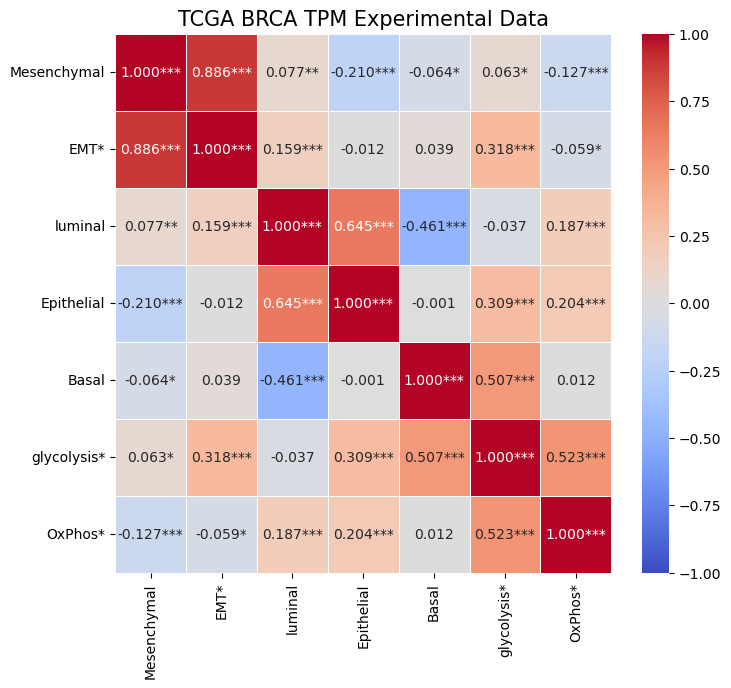

In [59]:
# Plot EMT heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(
    ordered_corr_matrix_simulated,
    annot=annot_matrix_req,
    vmin = -1, vmax= 1,
    fmt="",
    cmap="coolwarm",
    annot_kws={"fontsize": 10},
    linewidths=0.5,
    cbar= True
)
plt.title("TCGA BRCA TPM Experimental Data", size=15)
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

# Principal Component Analysis for model 3

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_data = pca.fit_transform(model3_raw.iloc[:, 3:34].values)
pca_data = pd.DataFrame(pca_data, columns = ["PC1", "PC2", "PC3", "PC4"])
pca_data

,PC1,PC2,PC3,PC4
0,-105.907876,-11.857150,1.986421,23.624749
1,143.309448,-6.702370,-12.494247,3.475054
2,55.312603,32.015700,31.199325,-1.115876
3,23.590317,28.449773,-19.875358,-12.872216
4,119.198401,-27.934364,-4.196467,4.058693
...,...,...,...,...
66407,57.920949,9.077049,31.393286,-6.627544
66408,149.360585,-16.078241,-6.330613,6.411154
66409,28.521002,3.860342,-27.349421,-20.972970
66410,2.730117,-11.650926,2.509972,-12.846015


In [95]:
pca.explained_variance_ratio_

array([0.83095385, 0.05737593, 0.02997323, 0.0264648 ])

In [96]:
pc1_components = pd.DataFrame(pca.components_[0], index = model3_raw.columns[3:34], columns = ["PC1"])
pc2_components = pd.DataFrame(pca.components_[1], index = model3_raw.columns[3:34], columns = ["PC2"])
pc1_components = pc1_components.sort_values(by = "PC1", ascending = False)
pc2_components = pc2_components.sort_values(by = "PC2", ascending = False)

/tmp/ipykernel_430121/2155440693.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pc1_components["PC1"], y=pc1_components.index, palette="Spectral")


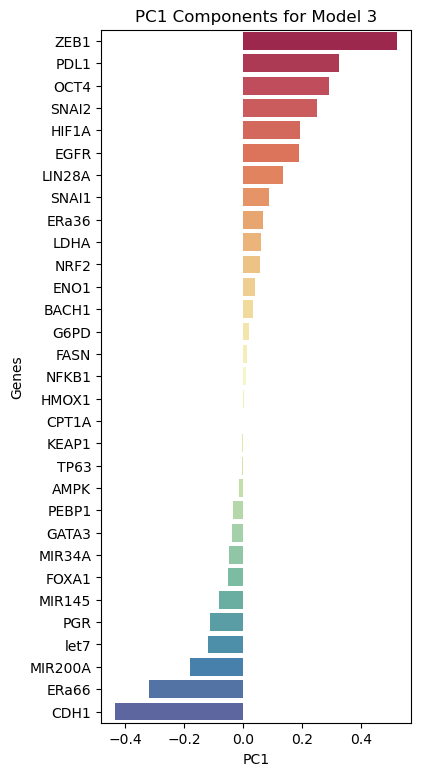

In [ ]:
plt.figure(figsize=(4, 9))

sns.barplot(x=pc1_components["PC1"], y=pc1_components.index, palette="Spectral")
plt.xlabel("PC1")
plt.ylabel("Genes")
plt.title("PC1 Components for Model 3")

# Save plot
plt.savefig("./RACIPE/CCLE_Heatmaps/PC1_components.png", dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

/tmp/ipykernel_430121/784795156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pc2_components["PC2"], y = pc2_components.index, palette = "Spectral")


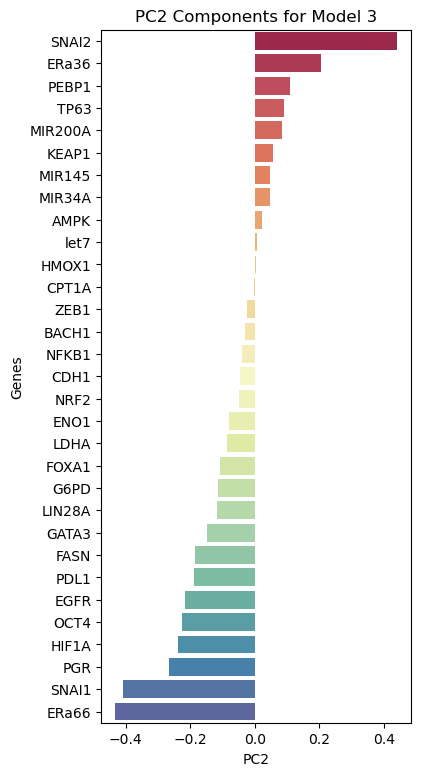

In [ ]:
plt.figure(figsize= (4, 9))

sns.barplot(x = pc2_components["PC2"], y = pc2_components.index, palette = "Spectral")
plt.xlabel("PC2")
plt.ylabel("Genes")
plt.title("PC2 Components for Model 3")
# Save plot
plt.savefig("./RACIPE/CCLE_Heatmaps/PC2_components.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Adjacency Matrix

In [ ]:
import pandas as pd
model3_topology = pd.read_csv("./RACIPE/MS_Thesis_30_Mar/racipe_outputs/final_network.topo", sep="\t")
model3_topology

,Source,Target,Type
0,SNAI1,MIR34A,2
1,SNAI1,ZEB1,1
2,SNAI1,SNAI1,2
3,SNAI1,MIR200A,2
4,SNAI1,SNAI2,2
...,...,...,...
290,GATA3,ZEB1,2
291,TP63,ZEB1,2
292,ZEB1,TP63,2
293,NFKB1,CDH1,1


In [ ]:
import pandas as pd

def topo_to_adj(model_topology):
    try:
        source_nodes = set(model_topology['Source'])
        target_nodes = set(model_topology['Target'])
    except KeyError:
        print("Warning: Assuming column indices 0 (Source) and 1 (Target) for topology.")
        source_nodes = set(model_topology.iloc[:, 0])
        target_nodes = set(model_topology.iloc[:, 1])

    all_nodes = sorted(list(source_nodes.union(target_nodes)))
    n = len(all_nodes)

    adj = pd.DataFrame(0, index=all_nodes, columns=all_nodes)

    for i in range(len(model_topology)):
        try:
            source = model_topology.iloc[i]['Source']
            target = model_topology.iloc[i]['Target']
            interaction_type = model_topology.iloc[i]['Type']
        except (KeyError, IndexError):
             source = model_topology.iloc[i, 0]
             target = model_topology.iloc[i, 1]
             interaction_type = model_topology.iloc[i, 2]

        if source in adj.index and target in adj.columns:
            if interaction_type == 1:
                adj.loc[source, target] = 1
            elif interaction_type == 2:
                adj.loc[source, target] = -1
        else:
            print(f"Warning: Skipping edge {i} ({source} -> {target}) because node not found in derived node list. This shouldn't happen.")


    return adj

In [35]:
adj_mat = topo_to_adj(model3_topology)
adj_mat

,AMPK,BACH1,CDH1,CPT1A,EGFR,ENO1,ERa36,ERa66,FASN,FOXA1,...,NRF2,OCT4,PDL1,PEBP1,PGR,SNAI1,SNAI2,TP63,ZEB1,let7
AMPK,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,-1,0
BACH1,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,1,1,0,0,0
CDH1,0,0,0,0,1,0,0,0,0,0,...,-1,-1,0,0,0,0,0,0,-1,0
CPT1A,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
EGFR,0,0,-1,0,0,0,0,-1,1,0,...,1,1,1,-1,0,1,1,0,1,0
ENO1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERa36,0,0,-1,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
ERa66,0,0,-1,0,0,0,-1,1,1,0,...,0,0,-1,0,1,0,-1,0,0,1
FASN,0,0,-1,0,1,0,0,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
FOXA1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,-1,0,0,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

try:
    g = sns.clustermap(
        adj_mat,
        cmap='coolwarm',     
        vmin=-1, vmax=1,      
        linewidths=0.5,        
        linecolor='lightgrey', 
        figsize=(18, 18),    
        annot=False,          
        xticklabels=True,     
        yticklabels=True      
    )


    # Rotate labels
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=10) 
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10) 

    # Set x and y labels
    g.ax_heatmap.set_xlabel('Target Node (Clustered)', fontsize=14)
    g.ax_heatmap.set_ylabel('Source Node (Clustered)', fontsize=14)

    plt.suptitle('Adjacency Matrix for Model 3', fontsize=20, y=1.02) # Adjust y position

    # Save the figure
    plt.savefig("./Final_Plots/adjacency_matrix_model_3.png", dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

except Exception as e:
    print(f"An error occurred during clustermap generation: {e}")

In [ ]:
import pandas as pd
import numpy as np

def calculate_influence(dp, j):

    adj = topo_to_adj(dp)
    n = adj.shape[0]

    maxi = adj.abs() 
    pr = adj.copy()  # Path result matrix for step i
    mr = maxi.copy() # Max influence path result matrix for step i
    infl_total = adj.copy() # Accumulator for influence (starts with step 1 influence)

    print(f"Calculating influence for j={j} steps. Matrix size: {adj.shape}")

    for i in range(1, j): 
        print(f"  Step {i+1}/{j}...")
        if not isinstance(pr, pd.DataFrame): pr = pd.DataFrame(pr)
        pr_next = adj @ pr

        if not isinstance(mr, pd.DataFrame): mr = pd.DataFrame(mr) 
        mr_next = maxi @ mr

        with np.errstate(divide='ignore', invalid='ignore'):
             qwe = pr_next / mr_next

        qwe = qwe.replace([np.inf, -np.inf, np.nan], 0)
        infl_total = infl_total + qwe
        pr = pr_next
        mr = mr_next

    infl_avg = infl_total / j
    infl_avg = infl_avg.round(2)

    print("Influence calculation complete.")
    return infl_avg

In [48]:
infl_mat = calculate_influence(model3_topology, 5)

Calculating influence for j=5 steps. Matrix size: (32, 32)
  Step 2/5...
  Step 3/5...
  Step 4/5...
  Step 5/5...
Influence calculation complete.


In [49]:
infl_mat = infl_mat.sort_values(by='MIR200A', ascending=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

try:
    g = sns.clustermap(
        adj_mat,
        cmap='coolwarm',     
        vmin=-1, vmax=1,      
        linewidths=0.5,        
        linecolor='lightgrey', 
        figsize=(18, 18),    
        annot=False,          
        xticklabels=True,     
        yticklabels=True      
    )


    # Rotate labels
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=18) 
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=18)

    g.ax_heatmap.set_xlabel('Target Node', fontsize=17)
    g.ax_heatmap.set_ylabel('Source Node', fontsize=17)

    plt.suptitle('Influence Matrix for Model 3', fontsize=30, y=1.02)

    # Save the figure
    plt.savefig("./Final_Plots/influence_matrix_sorted_length5_model_3.png", dpi=300, bbox_inches='tight', facecolor='white')

except Exception as e:
    print(f"An error occurred during clustermap generation: {e}")

miR200 is used as a reference because it is a strong epithelial marker.

In [52]:
Team1 = []
Team2 = []
for i in infl_mat.index:
    if infl_mat.loc[i,'MIR200A'] >= 0:
        Team1.append(i)
    elif infl_mat.loc[i,'MIR200A'] <= 0:
        Team2.append(i) 

print(Team1)
print(Team2)

['GPX4', 'ERa66', 'HMOX1', 'MIR200A', 'KEAP1', 'CDH1', 'MIR34A', 'AMPK', 'GATA3', 'FOXA1', 'PEBP1', 'MIR145', 'let7']
['ZEB1', 'HIF1A', 'ENO1', 'FASN', 'PDL1', 'ERa36', 'EGFR', 'SNAI2', 'LDHA', 'LIN28A', 'OCT4', 'NFKB1', 'CPT1A', 'BACH1', 'SNAI1', 'PGR', 'G6PD', 'TP63', 'NRF2']


In [ ]:
TeamScores = pd.DataFrame(0, columns = [0,1], index = [0,1] )

teams = [Team1, Team2]

for t1 in range(len(teams)):
    for t2 in range(len(teams)):
        Tsc= 0 
        count = 0
        for i in teams[t1]:
            for j in teams[t2]:
                 Tsc += infl_mat.loc[i,j]
                 count +=1
        TeamScores.loc[t1,t2] = Tsc/count   

TeamScores.columns = ['Team2','Team1']

TeamScores.index = ['Team2','Team1']
TeamScores

/tmp/ipykernel_435425/3811559290.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.19698224852071008' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  TeamScores.loc[t1,t2] = Tsc/count
/tmp/ipykernel_435425/3811559290.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.15967611336032392' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  TeamScores.loc[t1,t2] = Tsc/count


,TeamB,TeamA
TeamB,0.196982,-0.159676
TeamA,-0.271457,0.242881


In [55]:
abs(TeamScores).sum(axis = 1).sum(axis = 0)/4

0.21774918454654235

In [ ]:
import random
from turtle import position
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# Helper Functions
# ==============================================================================

def topo_to_adj(model_topology): 
    try:
        source_col, target_col, type_col = 'Source', 'Target', 'Type'
        source_nodes = set(model_topology[source_col])
        target_nodes = set(model_topology[target_col])
    except KeyError:
        print("Error: Could not find 'Source', 'Target' columns. Check DataFrame.")
        print("Attempting fallback using iloc[0], iloc[1]...")
        source_nodes = set(model_topology.iloc[:, 0])
        target_nodes = set(model_topology.iloc[:, 1])
        type_col = 2

    all_nodes = sorted(list(source_nodes.union(target_nodes)))
    n = len(all_nodes)
    if n == 0:
         print("Warning: No nodes found in topology.")
         return pd.DataFrame()

    print(f"topo_to_adj: Found {n} unique nodes. Creating {n}x{n} matrix.")
    adj = pd.DataFrame(0, index=all_nodes, columns=all_nodes)

    for i in range(len(model_topology)):
        try:
            if isinstance(type_col, str):
                 source = model_topology.iloc[i][source_col]
                 target = model_topology.iloc[i][target_col]
                 interaction_type = model_topology.iloc[i][type_col]
            else:
                 source = model_topology.iloc[i, 0]
                 target = model_topology.iloc[i, 1]
                 interaction_type = model_topology.iloc[i, 2]

            if source in adj.index and target in adj.columns:
                if interaction_type == 1:
                    adj.loc[source, target] = 1
                elif interaction_type == 2:
                    adj.loc[source, target] = -1
        except Exception as e:
             print(f"Warning: Error processing row {i} in topology: {e}")
             continue

    return adj

def calculate_influence_corrected(adj, j):
    """Calculates influence matrix based on path propagation (Corrected)."""
    n = adj.shape[0]
    if not isinstance(adj, pd.DataFrame) or adj.empty or adj.shape[0] != adj.shape[1]:
        print("Error: Invalid adjacency matrix passed to calculate_influence.")
        return pd.DataFrame()

    maxi = adj.abs()
    pr = adj.copy()
    mr = maxi.copy()
    infl_total = adj.copy()

    print(f"Calculating influence for j={j} steps. Matrix size: {adj.shape}")

    for i in range(1, j):
        print(f"  Step {i+1}/{j}...")
        pr_next = adj @ pr
        mr_next = maxi @ mr
        with np.errstate(divide='ignore', invalid='ignore'):
             qwe = pr_next / mr_next
        qwe = qwe.replace([np.inf, -np.inf, np.nan], 0)
        infl_total = infl_total + qwe
        pr = pr_next
        mr = mr_next

    infl_avg = infl_total / j
    infl_avg = infl_avg.round(2)
    return infl_avg

def calculate_team_strength(influence_matrix, ref_node='MIR200A'):
    """Calculates team strength metric based on influence TO ref_node."""
    if not isinstance(influence_matrix, pd.DataFrame) or influence_matrix.empty:
        print("Warning: Invalid or empty influence matrix passed to calculate_team_strength. Returning NaN.")
        return np.nan

    if ref_node not in influence_matrix.columns:
        print(f"Warning: Reference node '{ref_node}' not found as a COLUMN in influence matrix. Returning NaN.")
        print(f"   Available columns: {influence_matrix.columns.tolist()}")
        return np.nan
    if ref_node not in influence_matrix.index:
         print(f"Warning: Reference node '{ref_node}' not found as a ROW in influence matrix. Returning NaN.")
         print(f"   Available rows: {influence_matrix.index.tolist()}")
         return np.nan

    Team1, Team2 = [], []
    for i in influence_matrix.index:
        if i == ref_node: continue
        influence_value = influence_matrix.loc[i, ref_node]
        if influence_value >= 0: Team1.append(i)
        else: Team2.append(i)

    TeamScores = pd.DataFrame(0.0, columns=['Team1','Team2'], index=['Team1','Team2'])
    teams = [Team1, Team2]

    for t1_idx, team1_nodes in enumerate(teams):
        for t2_idx, team2_nodes in enumerate(teams):
            Tsc, count = 0.0, 0
            team1_label, team2_label = f"Team{t1_idx+1}", f"Team{t2_idx+1}"
            if not team1_nodes or not team2_nodes:
                TeamScores.loc[team1_label, team2_label] = 0.0
                continue
            for source_node in team1_nodes:
                for target_node in team2_nodes:
                    if source_node in influence_matrix.index and target_node in influence_matrix.columns:
                        Tsc += influence_matrix.loc[source_node, target_node]
                        count += 1
            if count > 0: TeamScores.loc[team1_label, team2_label] = Tsc / count
            else: TeamScores.loc[team1_label, team2_label] = 0.0

    final_strength = np.abs(TeamScores).sum(axis=1).sum(axis=0) / 4
    return final_strength


In [ ]:

# ==============================================================================
# --- Main Script ---
# ==============================================================================

try:
    original_dp = model3_topology.copy()
    if not isinstance(original_dp, pd.DataFrame):
         raise TypeError("model3_topology is not a pandas DataFrame")
    print(f"Original Topology Loaded. Shape: {original_dp.shape}")

    print(f"Columns in original_dp: {original_dp.columns.tolist()}")
except NameError:
    print("Error: model3_topology not defined. Please load your network topology.")
    exit()
except Exception as e:
    print(f"Error loading or verifying model3_topology: {e}")
    exit()


num_randomizations = 10000
influence_steps = 8
randomized_strengths_log = []
ref_node_for_teams = 'MIR200A'

print("\nCalculating strength for the original network...")
try:
    adj_orig = topo_to_adj(original_dp)
    infl_orig = calculate_influence_corrected(adj_orig, influence_steps)

    print(f"Original Influence Matrix Shape: {infl_orig.shape}")
    if infl_orig.empty:
        raise ValueError("Original influence matrix calculation failed or resulted in empty matrix.")

    original_strength = calculate_team_strength(infl_orig, ref_node=ref_node_for_teams)
    print(f"Original Network Strength: {original_strength:.4f}")

except Exception as e:
    print(f"Error calculating original network strength: {e}")
    original_strength = np.nan


print(f"\nCalculating strength for {num_randomizations} randomized networks...")
for oi in range(num_randomizations):
    dp_shuffled = original_dp.copy()
    if 'Type' not in dp_shuffled.columns:
        print("Error: 'Type' column not found in DataFrame for shuffling.")
        break
    edges = list(dp_shuffled['Type'])
    random.shuffle(edges)
    dp_shuffled['Type'] = edges

    try:
        adj_rand = topo_to_adj(dp_shuffled)
        infl_rand = calculate_influence_corrected(adj_rand, influence_steps)

        if infl_rand.empty:
             print(f"    Warning: Influence calculation failed for randomization {oi+1}")
             continue

        strength_rand = calculate_team_strength(infl_rand, ref_node=ref_node_for_teams)

        if not np.isnan(strength_rand):
             randomized_strengths_log.append(strength_rand)

    except Exception as e:
        print(f"    Error during randomization {oi+1}: {e}")

print(f"Original Network Strength: {original_strength:.4f}")

# SAVE THE RANDOMIZED STRENGTHS LOG
randomized_strengths_log_path = "./Final_Plots/randomized_strengths_log.csv"
try:
    pd.DataFrame(randomized_strengths_log).to_csv(randomized_strengths_log_path, index=False)
    print(f"Randomized strengths log saved to: {randomized_strengths_log_path}")
except Exception as e:
    print(f"Error saving randomized strengths log: {e}")

if randomized_strengths_log:
    avg_random_strength = np.mean(randomized_strengths_log)
    std_random_strength = np.std(randomized_strengths_log)
    print(f"Randomized Networks Strength ({len(randomized_strengths_log)} valid): Avg ± Std = {avg_random_strength:.4f} ± {std_random_strength:.4f}")

    if not np.isnan(original_strength):
        count_extreme = sum(s >= original_strength for s in randomized_strengths_log)
        p_value = (count_extreme + 1) / (len(randomized_strengths_log) + 1)
        print(f"Empirical p-value (P(Random >= Original)): {p_value:.4f}")
    else:
        print("Cannot calculate p-value because original strength is NaN.")



Generating histogram...


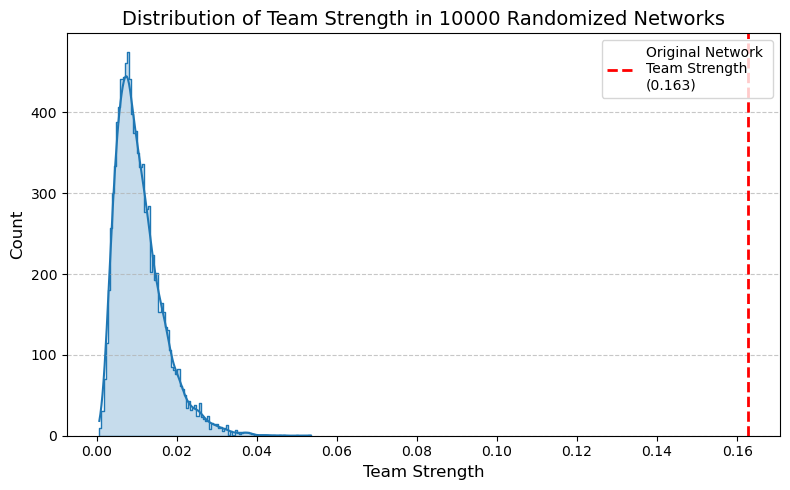

In [ ]:
randomized_strengths_log = pd.read_csv("./Final_Plots/randomized_strengths_log_10000.csv")

# --- Plotting Section ---
print("\nGenerating histogram...")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.histplot(
    data=randomized_strengths_log,
    stat="count",       
    bins=100,            
    color="skyblue",    
    element="step",     
    kde=True           
)


if not np.isnan(original_strength):
    plt.axvline(
        x=original_strength,
        color='r',
        linestyle='--',  
        linewidth=2,
        label=f'Original Network \nTeam Strength \n({original_strength:.3f})'
    )
    plt.legend(loc='upper right', fontsize=10)
    plt.xlabel('Team Strength', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Distribution of Team Strength in 10000 Randomized Networks', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # Save the figure
    plt.savefig("./Final_Plots/team_strength_10000_histogram.png", dpi=300, bbox_inches='tight', facecolor='white')